# Libraries, directory and data

In [ ]:
#libraries
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns

In [ ]:
#load the data
df = pd.read_csv('Clothing.csv')
df.head()

# Analysing the data

In [3]:
df.describe()

,tsales,sales,margin,nown,nfull,npart,naux,hoursw,hourspw,inv1,inv2,ssize,start
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,4.000000e+02,400.000000,400.000000,400.000000
mean,8.335842e+05,6334.751278,38.774230,1.283796,2.069384,1.565539,1.389747,121.137500,18.955044,5.825726e+04,27829.217000,151.050000,42.808462
std,5.834638e+05,3739.343624,5.218184,0.639773,1.015598,0.705999,0.394514,64.435343,7.343363,1.075588e+05,41501.943418,112.498254,13.296070
min,5.000000e+04,300.000000,16.000000,1.000000,1.000000,1.000000,1.000000,32.000000,5.707966,1.000000e+03,350.000000,16.000000,16.000000
25%,4.953400e+05,3904.200000,37.000000,1.000000,1.923100,1.283300,1.333300,80.000000,13.541198,2.000000e+04,10000.000000,80.000000,37.000000
50%,6.942270e+05,5278.935000,39.000000,1.000000,1.955600,1.283300,1.367300,104.000000,17.744585,2.220704e+04,22859.850000,120.000000,40.000000
75%,9.768170e+05,7739.899250,41.000000,1.295225,2.066400,2.000000,1.367300,145.250000,24.302982,6.226923e+04,22859.850000,190.000000,42.000000
max,5.000000e+06,27000.000000,66.000000,10.000000,8.000000,9.000000,4.000000,582.000000,43.326020,1.500000e+06,400000.000000,1214.000000,90.000000


/Users/wellingtonpedro/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


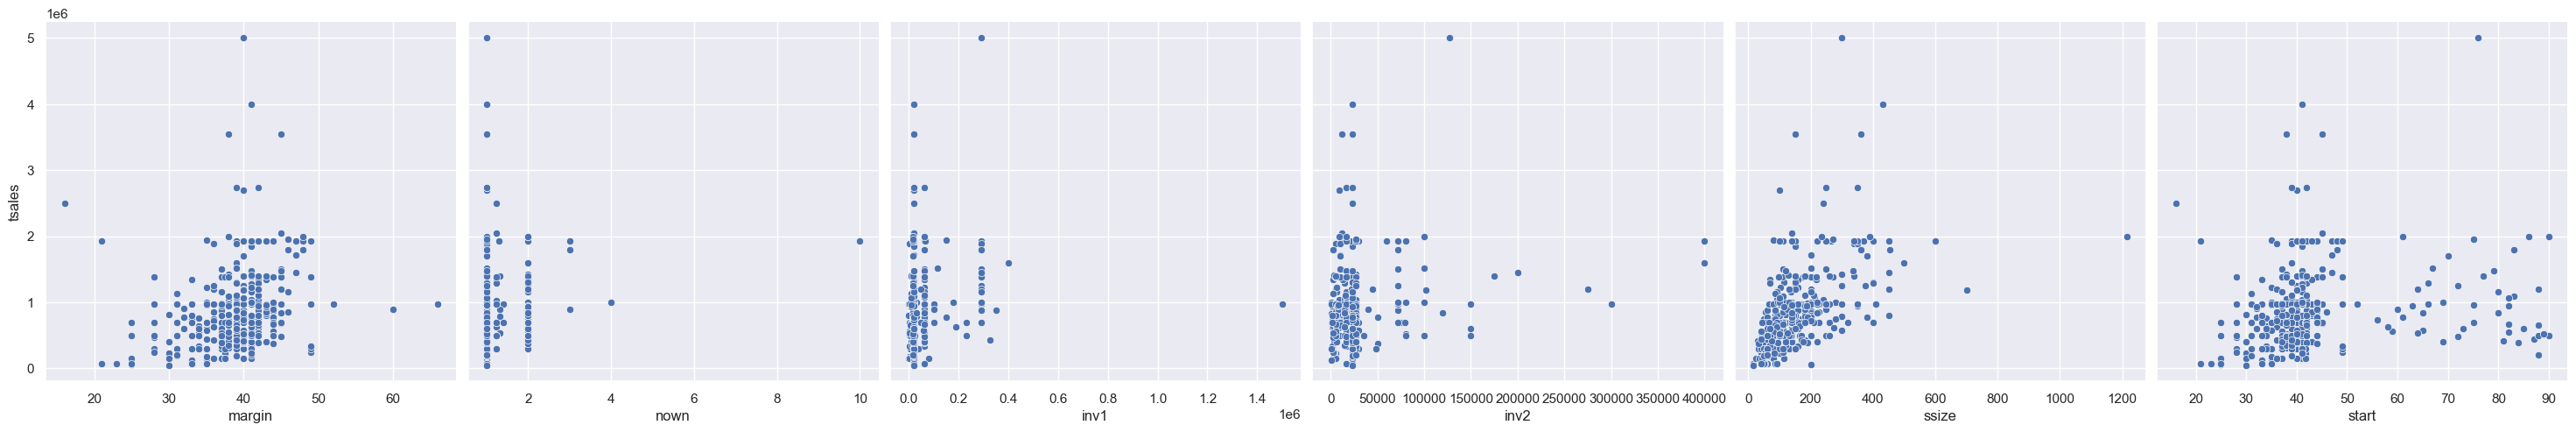

In [20]:
#plotting continuos independent variables against dependent variable 
sns.set(font_scale=1)
sns.pairplot(data=df,
             y_vars=['tsales'],
             x_vars=['margin' ,'nown', 'inv1', 'inv2', 'ssize', 'start'],
             height=5)

<Axes: >

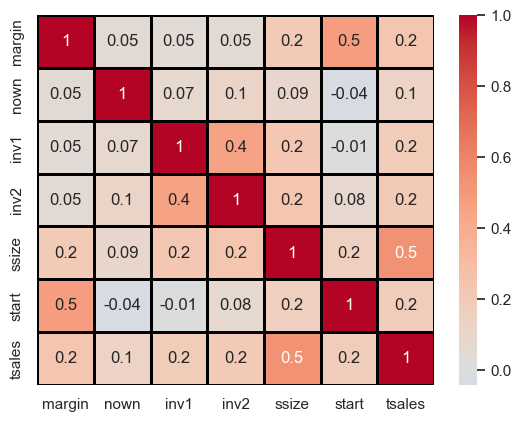

In [22]:
#Correlation matrix
columns = ['margin' ,'nown', 'inv1', 'inv2', 'ssize', 'start', 'tsales']
sns.heatmap(df[columns].corr(),
            annot=True,
            fmt='.1g',
            center=0,
            cmap='coolwarm',
            linewidths=1,
            linecolor='black')

# Multilinear regression preparation

In [29]:
#isolate X and Y
y = df.tsales / 1000
# X = df[['margin' ,'nown', 'inv1', 'inv2', 'ssize', 'start']]
X = df[['margin' , 'ssize']]
X.head()


,margin,ssize
0,41.0,170
1,39.0,450
2,40.0,300
3,40.0,260
4,44.0,50


In [30]:
#Add a constant
X = sm.add_constant(X)
X.head()

,const,margin,ssize
0,1.0,41.0,170
1,1.0,39.0,450
2,1.0,40.0,300
3,1.0,40.0,260
4,1.0,44.0,50


In [31]:
#Training and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1502)
X_train.head()

,const,margin,ssize
201,1.0,42.0,400
25,1.0,35.0,160
94,1.0,39.0,200
346,1.0,47.0,450
121,1.0,37.0,350


# Multilinear Regression

In [32]:
#Multilinear Regression
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 tsales   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     68.17
Date:                Tue, 24 Oct 2023   Prob (F-statistic):           2.37e-25
Time:                        23:11:29   Log-Likelihood:                -2427.1
No. Observations:                 320   AIC:                             4860.
Df Residuals:                     317   BIC:                             4871.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -150.6325    196.352     -0.767      0.4

# Accuracy Assessment

In [33]:
#Predict
predictions = model.predict(X_test)
predictions[:4]

270    1690.197470
380     731.548667
326     712.856464
60      683.240069
dtype: float64

In [34]:
#Accuracy assessment
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE:", round(mean_absolute_error(y_test, predictions),1))
print("RMSE:",round(np.sqrt(mean_squared_error(y_test, predictions)),1))

MAE: 346.8
RMSE: 532.3
